# Laboratorio Regresión Lineal

### Sergio Alba - Código 202010351

## Importar librerías

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


from sklearn import datasets, linear_model
#import statsmodels.api as sm
from scipy import stats

## Cargue del dataset

url del dataset:
https://www.kaggle.com/mirichoi0218/insurance

In [5]:
dataset = pd.read_csv('insurance.csv')

In [6]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Validación de datos vacíos

In [8]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## Construcción de matriz con las variables explicativas y objetivo

In [9]:
X = dataset.drop(['charges'],axis=1)
y = dataset['charges']

In [13]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


Validación de la variable charges

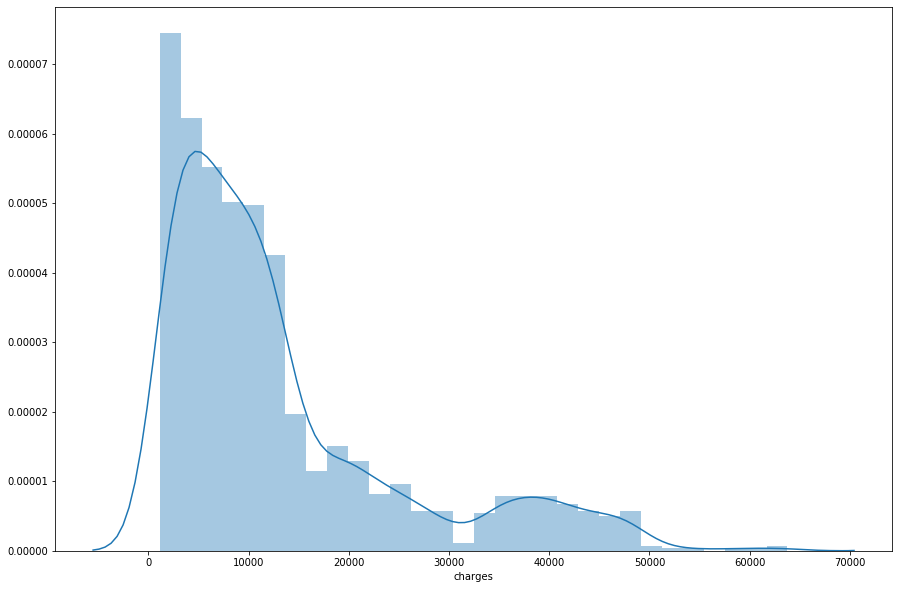

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['charges'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEF9BA3B08>,
      dtype=object)

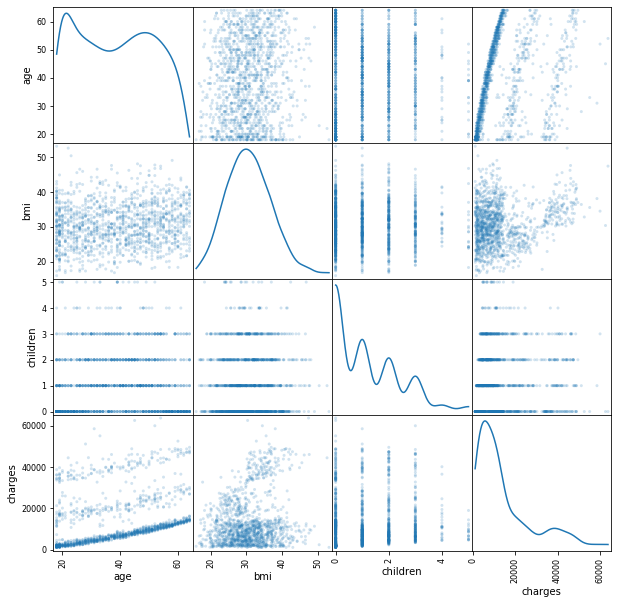

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, alpha=0.2, figsize=(10, 10), diagonal='kde')

Transformación de variables categóricas para incluirlas al modelo de regresión lineal

In [14]:
X = pd.get_dummies(X)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


## Generación de la data de entrenamiento y test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
display(X_train.head())
display(y_train.head())

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
621,37,34.100,4,0,1,0,1,0,0,0,1
194,18,34.430,0,0,1,1,0,0,0,1,0
240,23,36.670,2,1,0,0,1,1,0,0,0
1168,32,35.200,2,0,1,1,0,0,0,0,1
1192,58,32.395,1,1,0,1,0,1,0,0,0


621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

### Generación del modelo

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Validación de la intercepción y coeficientes calculados por el modelo

In [19]:
print("Intercepción:",regressor.intercept_)
coeff_df = pd.DataFrame(zip(X.columns,regressor.coef_))  
coeff_df

Intercepción: -517.1368358425534


,0,1
0,age,253.700500
1,bmi,335.962814
2,children,436.910121
3,sex_female,7.731864
4,sex_male,-7.731864
5,smoker_no,-11802.508634
6,smoker_yes,11802.508634
7,region_northeast,483.840068
8,region_northwest,223.707336
9,region_southeast,-429.438766


### Predicción

Se aplica el modelo sobre los datos de Test

In [20]:
y_pred = regressor.predict(X_test)

Se comparan los resultados predictos con los reales

In [22]:
df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Real,Predicted
578,9724.53000,11169.927119
610,8547.69130,9486.709085
569,45702.02235,38181.123053
1034,12950.07120,16266.313289
198,9644.25250,6914.648007
981,4500.33925,3963.484876
31,2198.18985,1579.396913
1256,11436.73815,14385.256569
1219,7537.16390,9012.579696
1320,5425.02335,7508.460677


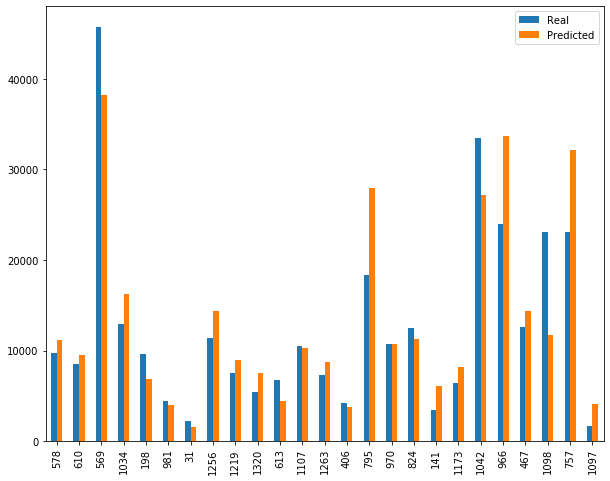

In [23]:
df1.plot(kind='bar',figsize=(10,8))

plt.show()

### Métricas de errores del modelo

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3933.272649405236
Mean Squared Error: 31827950.22952383
Root Mean Squared Error: 5641.626558850189
R^2: 0.7999876970680434


## Análisis

    1. ¿Qué significado tiene el intercepto? ¿Tiene sentido ser analizado para este problema?
    2. ¿Qué significado tienen los coeficientes que acompañan a las variables categóricas? (i.e smoker_no, smoker_yes)
    3. Realice la estimación de la variable respuesta pero solo con las variables numéricas. ¿Cuál modelo utilizaría para predecir la prima del seguro? ¿Por qué?



# Punto 01
La intercepción obtenida por el modelo es la siguiente

In [25]:
print("Intercepción:",regressor.intercept_)

Intercepción: -517.1368358425534


## Respuesta 01

El modelo de regresión lineal representa nuestro problema teniendo en cuenta la ecuación de una recta. Esta ecuación por ejemplo sería:

y = mx + b

Para nuestro caso, tendríamos más de una variable, pero la intercepción si es única, la cual la podemos tomar como nuestro valor base. Por lo tanto, si las variables tomaran un valor 0, nuestro valor calculado sería de -517.1368358425534. Es decir que los costos médicos facturados por el seguro inician en este valor.

Si bien las variables nunca van a ser 0 y el modelo nunca va a predecir el valor de la intercepción, sí es un valor que se debe tener en cuenta ya que es una constante y un valor fijo en cualquier predicción. 

# Punto 02

Recordemos nuestro dataset original

In [26]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Análisis de las variables categóricas

In [29]:
dataset.sex.unique()

array(['female', 'male'], dtype=object)

In [30]:
dataset.smoker.unique()

array(['yes', 'no'], dtype=object)

In [31]:
dataset.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Del dataset tenemos 3 variables categóricas:

1. Sex. Solo dos posibles valores, female y male
2. smoker. Dos posibles valores, yes y no
3. region. Cuatro posibles valores, northwest, northeast, southeast y southwest

Estas variables se convirtieron a variables dummys para poder ser utilizadas en la predicción del modelo

In [32]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Con lo anterior, vemos que para las variables categóricas de sex y smoke solo tenemos dos posibles valores y como nuestro modelo las utiliza en modo dummy, entonces  tomará el valor de 1 en una variable y en la contraria tomará el valor de 0. O sea, si para un caso sex_female es 1, el sex_male es 0. Lo mismo para smoker_no y smoker_yes. 

A continuación validamos los coeficinetes calculados por el modelo.

In [33]:
coeff_df

,0,1
0,age,253.700500
1,bmi,335.962814
2,children,436.910121
3,sex_female,7.731864
4,sex_male,-7.731864
5,smoker_no,-11802.508634
6,smoker_yes,11802.508634
7,region_northeast,483.840068
8,region_northwest,223.707336
9,region_southeast,-429.438766


## Respuesta 02

Al validar los coeficientes calculados por el modelo, vemos que tanto para el sex_male/sex_female y  smoke_no/smoke_yes se presentan valores positivos y negativos con igual valor absoluto. Esto ya que estas variables son mutuamente excluyentes, si se presenta una la otra no y viceversa. 

El impacto a la predicción se ve en que si es mujer, aportará un valor de  7.731864 a la predicción, y si no es mujer ( o sea es hombre) aporta un valor de -7.731864. El impacto del sexo en los costos médicos es el doble cuando es mujer que cuando es hombre. Lo mismo cuando se es fumador o cuando no.

En el caso de la región, si bien es categórica pero puede tomar 4 posibles valores, no se presentan estos valores de igual valor absoluto pero de diferente signo aunque si presentan un comportamiento similar si se enfocara en cuanto si la región es del norte o del sur. Se puede decir que cuando la persona es del norte aumentan los costos médicos que cuando es del sur.

# Punto 03

Se genera la matriz solo con las variables numéricas

In [34]:
X = dataset.drop(['charges','sex','smoker','region'],axis=1)
y = dataset['charges']

Se genera la data de entrenamiento y Test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
display(X_train.head())
display(y_train.head())

,age,bmi,children
621,37,34.100,4
194,18,34.430,0
240,23,36.670,2
1168,32,35.200,2
1192,58,32.395,1


621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

Se crea el modelo de regresión lineal

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Se valida la intercepeción y los coeficientes de este modelo

In [37]:
print("Intercepción:",regressor.intercept_)
coeff_df = pd.DataFrame(zip(X.columns,regressor.coef_))  
coeff_df

Intercepción: -5292.837634337049


,0,1
0,age,220.502324
1,bmi,298.149942
2,children,660.218124


Se realiza la predicción

In [38]:
y_pred = regressor.predict(X_test)

Comparamos los valores reales y los que predice el modelo

In [39]:
df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Real,Predicted
578,9724.53000,15837.629611
610,8547.69130,14487.653537
569,45702.02235,18706.162588
1034,12950.07120,19600.798933
198,9644.25250,11334.387366
981,4500.33925,8577.196408
31,2198.18985,6522.019932
1256,11436.73815,18781.620927
1219,7537.16390,14074.014817
1320,5425.02335,12785.416747


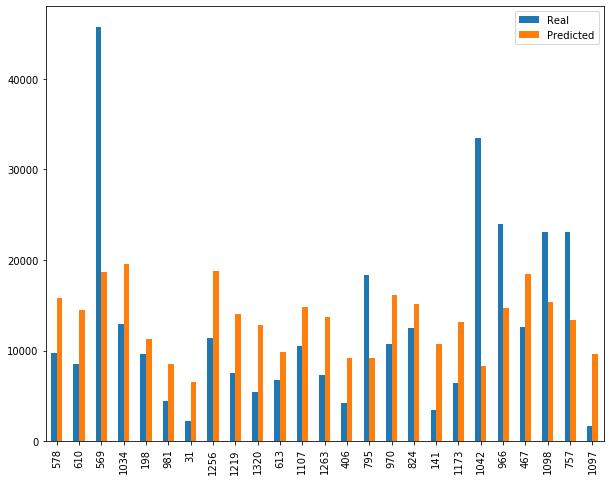

In [40]:
df1.plot(kind='bar',figsize=(10,8))

plt.show()

Obtenemos las métricas de error para este modelo

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 9016.002558195327
Mean Squared Error: 133189853.20376825
Root Mean Squared Error: 11540.790839616158
R^2: 0.16301209866339939


## Respuesta 03

El primer modelo de regresión lineal con todas las variables se comporta mucho mejor que el modelo de regresión solo con las variables numéricas. Las métricas de errores del primer modelo son mejores que las del segundo como podemos ver a continuación.

Metrica de error                  | Modelo con todas las variables                  | Modelo con variables numéricas
   ------------------------| ------------------------| -------------
 Media del error absoluto                  | 3933.272649405236                  | 9016.002558195327
 Error cuadratico medio   |    31827950.22952383         | 133189853.20376825
 Raiz del error cuadratico medio  |   5641.626558850189     | 11540.790839616158
 R^2        |    0.7999876970680434        | 0.16301209866339939
  

Como vemos en la anterior tabla comparativa, las métricas de error del modelo con todas las variables incluyendo las categóricas transformadas a dummies, son mucho mejores que el modelo con solo variables numéricas, la diferencia es muy grande e incluso el R^2 del modelo con solo las variables numéricas es de 0.16 mientras el otro de 0.79. Con lo cual se evidencia que es mejor modelo el que incluye todas las variables.

# Propuesta de un mejor modelo

En este caso al utilizar un modelo de regresión lineal, es mejor normalizar o escalar los datos, ya que en general los resultados son mejores. A continuación se construye un modelo normalizado con todas las variables.

In [42]:
#Generación de las matrices con todas las variables
X = dataset.drop(['charges'],axis=1)
y = dataset['charges']

#Generación variables dummies para las categóricas

X = pd.get_dummies(X)

#Generación del conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Construcción del modelo normalizado

In [43]:
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [44]:
print("Intercepción:",regressor.intercept_)
coeff_df = pd.DataFrame(zip(X.columns,regressor.coef_))  
coeff_df

Intercepción: 9.561548136088155e+16


,0,1
0,age,2.532876e+02
1,bmi,3.344143e+02
2,children,4.386380e+02
3,sex_female,-3.285471e+17
4,sex_male,-3.285471e+17
5,smoker_no,6.290061e+16
6,smoker_yes,6.290061e+16
7,region_northeast,1.700310e+17
8,region_northwest,1.700310e+17
9,region_southeast,1.700310e+17


In [45]:
y_pred = regressor.predict(X_test)

In [46]:
df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Real,Predicted
578,9724.53000,11056.0
610,8547.69130,9424.0
569,45702.02235,38128.0
1034,12950.07120,16144.0
198,9644.25250,6864.0
981,4500.33925,3984.0
31,2198.18985,1680.0
1256,11436.73815,14352.0
1219,7537.16390,8976.0
1320,5425.02335,7440.0


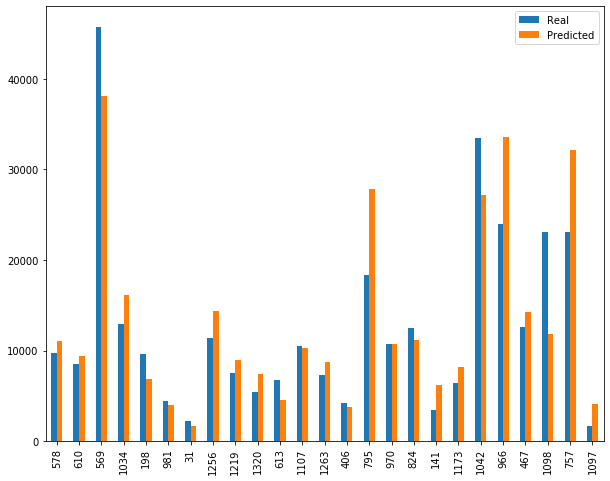

In [47]:
df1.plot(kind='bar',figsize=(10,8))

plt.show()

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3913.7014076455216
Mean Squared Error: 31795054.115680937
Root Mean Squared Error: 5638.710323795764
R^2: 0.8001944218944862


Al comparar las métricas de los 3 modelos construidos para este problema tenemos

Metrica de error  | Modelo con todas las variables    | Modelo con variables numéricas | Modelo normalizado con todas las variables 
   ------------------------| ------------------------| ------------- |  -------------
 Media del error absoluto                  | 3933.272649405236                  | 9016.002558195327 | 3913.7014076455216
 Error cuadratico medio   |    31827950.22952383         | 133189853.20376825 | 31795054.115680937
 Raiz del error cuadratico medio  |   5641.626558850189     | 11540.790839616158 | 5638.710323795764
 R^2        |    0.7999876970680434        | 0.16301209866339939 |  0.8001944218944862
 
 Como podemos observar el modelo normalizado tiene unas métricas de error más bajas que los demás, y el R^2 es más cercano a 1.